## Import Transcriptor:

In [9]:
import os
import cv2
from transcriptor import Transcriptor
from matplotlib import pyplot as plt
from ultralytics import YOLO

## Load Yolov8 Model and the Transcriptor:

In [5]:
transcriptor = Transcriptor()
model = YOLO("models/yolov8_h3.pt")

## Transcription:
#### Predict the Bounding Boxes and save them as a List of Tuples as shown bellow:

In [37]:
img_path = "dataset/images/1.png"

In [38]:
def get_bounding_boxes_yolov8(img_path):
    detections = model(img_path)
    confs = detections[0].boxes.conf
    classes = detections[0].boxes.cls
    boxes = detections[0].boxes.xyxy
    conf_thr = 0.0
    bounding_boxes = []
    for elem in zip(boxes, classes, confs):
        top_left = (int(elem[0][0]), int(elem[0][1]))
        bottom_right = (int(elem[0][2]), int(elem[0][3]))
        label = str(int(elem[1]))
        conf = float(elem[2])
        # Convert int value labels to their corresponding classes:
        if label == "10":
            label = "+"
        elif label == "11":
            label = "-"
        elif label == "12":
            label = "="
        elif label == "13":
            label = "c1"
        # Filter low-confidence detections:
        if conf > conf_thr:
            bounding_boxes.append(([top_left, bottom_right], label, conf))
    return bounding_boxes

In [39]:
bounding_boxes = get_bounding_boxes_yolov8(img_path)


image 1/1 /home/daniel/dev/HME-VAS/images/1.png: 320x224 2 1s, 1 4, 1 5, 1 6, 1 7, 1 +, 1 =, 10.6ms
Speed: 1.8ms preprocess, 10.6ms inference, 1.8ms postprocess per image at shape (1, 3, 320, 320)


#### Transcript the results using the Transcriptor:

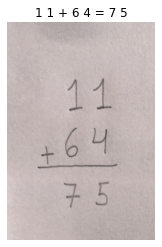

In [40]:
latex = transcriptor(bounding_boxes)
img = cv2.imread(img_path)
plt.imshow(img, cmap='gray')
plt.title(latex)
plt.axis('off')
plt.show()

## Transcript Multiple Images:


image 1/1 /home/daniel/dev/HME-VAS/images/237.png: 320x288 1 1, 1 2, 1 3, 1 5, 1 6, 1 7, 1 8, 1 9, 1 +, 1 =, 1 c1, 68.1ms
Speed: 1.8ms preprocess, 68.1ms inference, 3.1ms postprocess per image at shape (1, 3, 320, 320)


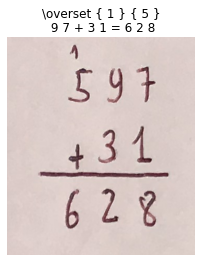


image 1/1 /home/daniel/dev/HME-VAS/images/207.png: 320x256 1 1, 1 4, 1 5, 2 6s, 2 9s, 1 -, 1 =, 4 c1s, 6.1ms
Speed: 0.8ms preprocess, 6.1ms inference, 1.3ms postprocess per image at shape (1, 3, 320, 320)


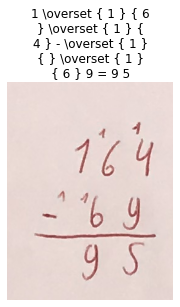


image 1/1 /home/daniel/dev/HME-VAS/images/83.png: 320x192 1 1, 4 2s, 1 3, 1 9, 1 +, 1 =, 1 c1, 14.4ms
Speed: 1.2ms preprocess, 14.4ms inference, 1.6ms postprocess per image at shape (1, 3, 320, 320)


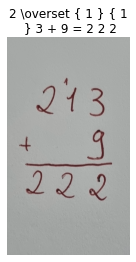


image 1/1 /home/daniel/dev/HME-VAS/images/217.png: 320x320 2 0s, 2 1s, 1 2, 1 7, 3 9s, 1 -, 1 =, 4 c1s, 8.7ms
Speed: 0.8ms preprocess, 8.7ms inference, 1.3ms postprocess per image at shape (1, 3, 320, 320)


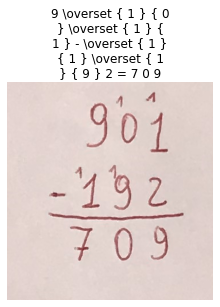


image 1/1 /home/daniel/dev/HME-VAS/images/140.png: 320x288 1 2, 2 3s, 1 4, 2 7s, 1 8, 2 9s, 1 -, 1 =, 4 c1s, 7.8ms
Speed: 1.0ms preprocess, 7.8ms inference, 1.6ms postprocess per image at shape (1, 3, 320, 320)


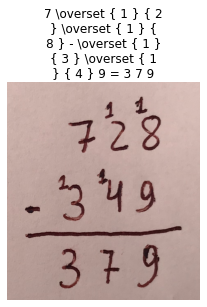

In [45]:
images = []
transcriptions = []

for image in os.listdir("images")[:5]: # 5 examples

    bounding_boxes = get_bounding_boxes_yolov8("images/"+image)

    latex = transcriptor(bounding_boxes)
    img = cv2.imread("dataset/images/"+image)
    plt.imshow(img, cmap='gray')
    if len(latex) > 20:
        broken_title = '\n'.join([latex[j:j+20] for j in range(0, len(latex), 20)])
        plt.title(broken_title)
    else:
        plt.title(latex)
    plt.axis('off')
    plt.show()